In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import ipywidgets as widget
from IPython.core.display import display, HTML
%matplotlib inline

conn = sqlite3.connect('/home/jelmert/Documents/decide-kopenhagen-no-ties.db')



In [2]:
cursor = conn.execute('SELECT `name`, `id` FROM actor ORDER BY `name`')
actors = cursor.fetchall()

df = pd.read_sql_query("""
        SELECT SUM(e.own)/1000 as own, SUM(e.inner_positive)/1000 as ip, SUM(e.inner_negative)/1000 as `in`, SUM(e.outer_positive)/1000 as op, SUM(e.outer_negative)/1000 as `on`, a.name actor, m.p FROM externality e
          JOIN actor a on e.actor_id = a.id
          JOIN iteration i on e.iteration_id = i.id
          JOIN repetition r on i.repetition_id = r.id
          JOIN modelrun m on r.model_run_id = m.id
          JOIN dataset d on a.data_set_id = d.id
          WHERE d.id = 1 
        GROUP BY e.actor_id, m.id ORDER BY m.p;
        """, 
                         conn,
                         index_col=['p'],                 
                        )

# Totaalscores
Alle resultaten zijn de totaalscore van de verschillende externaliteiten berekend gedeelt door het aantal herhalingen (1000). 
Hiervoor is gekozen omdat de kleinere ruilen het gemiddelde nogal kunnen beinvloeden. Het aantal ruilen met een `expected utility > 1.0` komt namelijk veel minder vaak voor dan ruilen met een `expected utility < 0.5`. Het gemiddelde komt hierdoor niet boven de `0.4`. 

Eveneens is er geen onderscheid gemaakt tussen de verschillende onderhandelingsrondes. Dit is niet nodig omdat je op deze manier de externaliteit per `p` waarde kunt vergelijken over het gehele model.


In [3]:
df_inner_positive = pd.pivot_table(df, index=['p'], columns=['actor'], values=['ip'])
df_inner_positive

ip                                                            \
actor Australia    Brazil    Canada EU (incl Norway)     Japan     Russia   
p                                                                           
0.00   0.869458  1.513761  1.757775         8.029999  1.385484  15.027160   
0.05   0.888764  1.919195  1.758869         8.107488  1.500964  15.159244   
0.15   0.870885  2.096825  1.717731         7.981856  1.511787  15.018651   
0.20   0.824433  2.313375  1.711378         8.456588  1.479243  15.043955   
0.25   0.793086  2.551897  1.699544         8.836052  1.475489  14.911025   
0.30   0.784677  2.694167  1.701270         9.125080  1.471424  14.882335   
0.35   0.787491  2.849932  1.721089         9.228291  1.486058  14.793281   
0.40   0.794978  3.078363  1.760937         9.698129  1.503970  14.782789   
0.45   0.802088  3.257633  1.773287         9.827648  1.517658  14.778954   
0.50   0.809506  3.528908  1.823208        10.239495  1.537095  14.767418   
0.55   0.841447  3.641372  1.838402        10.031023  1.568429  14.730890   
0.60   0.847177  3.829356  1.854478        10.195869  1.562660  14.736821   
0.65   0.844984  4.009117  1.846872        10.228326  1.564789  14.611722   
0.70   0.876808  4.151014  1.926307        10.257019  1.625371  14.640047   
0.75   0.894185  4.472055  1.951777        10.443400  1.619856  14.442945   
0.80   0.915334  4.651211  2.003460        10.539255  1.644927  14.353615   
0.85   0.923931  4.854272  2.012940        10.607338  1.644034  14.392554   
0.90   0.964733  5.086606  2.095998        10.814618  1.690598  14.386221   
1.00   0.996690  5.461987  2.201694        10.856763  1.780738  14.199191   

                 
actor       USA  
p                
0.00   0.119342  
0.05   0.178463  
0.15   0.195713  
0.20   0.209754  
0.25   0.229251  
0.30   0.250751  
0.35   0.263353  
0.40   0.281401  
0.45   0.311646  
0.50   0.338107  
0.55   0.365182  
0.60   0.391007  
0.65   0.430847  
0.70   0.467630  
0.75   0.486449  
0.80   0.504298  
0.85   0.541902  
0.90   0.566829  
1.00   0.650574

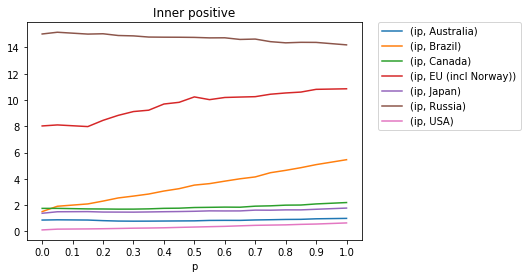

In [14]:
plt = df_inner_positive.plot()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.set_title('Inner positive')
plt.set_xticks([x*0.10 for x in range(11)])
plt

In [15]:
df_inner_negative = pd.pivot_table(df, index=['p'], columns=['actor'], values=['in'])
df_inner_negative

in                                                              \
actor  Australia     Brazil     Canada EU (incl Norway)      Japan    Russia   
p                                                                              
0.00  -70.784559 -26.798697 -21.107112       -33.959613 -23.784123 -9.213916   
0.05  -70.394104 -26.638083 -21.234710       -35.543598 -23.533919 -7.128242   
0.15  -69.368797 -26.988554 -22.705915       -37.292497 -23.862367 -7.540394   
0.20  -65.236766 -24.777631 -23.859103       -36.318885 -24.036913 -7.973726   
0.25  -61.738691 -23.432428 -25.318410       -36.236333 -24.406153 -8.328605   
0.30  -59.902844 -22.576730 -25.789741       -35.519794 -24.421458 -8.430770   
0.35  -59.226646 -22.141019 -26.072500       -35.381306 -24.395302 -8.465542   
0.40  -56.915470 -21.242337 -26.548958       -34.549267 -24.517280 -8.673515   
0.45  -56.064006 -20.696120 -26.532038       -34.338835 -24.472428 -8.665016   
0.50  -54.294277 -19.821447 -27.049748       -33.534094 -24.317685 -8.711501   
0.55  -55.240659 -20.848530 -26.714486       -34.183589 -24.098030 -8.646869   
0.60  -54.628928 -20.268349 -26.477726       -33.715164 -23.905349 -8.670481   
0.65  -54.195917 -20.446258 -26.656137       -33.771163 -23.849336 -8.650100   
0.70  -54.294273 -21.532376 -26.646541       -33.781459 -23.963973 -8.713317   
0.75  -53.340487 -20.906249 -26.595204       -33.272138 -23.591577 -8.704116   
0.80  -53.082453 -21.536767 -26.561496       -32.980265 -23.868722 -8.806797   
0.85  -53.157888 -20.940536 -26.283760       -33.285385 -23.362108 -8.792632   
0.90  -52.357500 -21.550918 -26.500594       -32.796241 -23.588668 -8.853434   
1.00  -52.824524 -22.614851 -26.035951       -32.987864 -23.108520 -8.993272   

                 
actor       USA  
p                
0.00  -1.735043  
0.05  -1.863730  
0.15  -1.958313  
0.20  -1.951844  
0.25  -1.935212  
0.30  -1.920222  
0.35  -1.934873  
0.40  -1.914356  
0.45  -1.945910  
0.50  -1.893927  
0.55  -1.931871  
0.60  -1.944541  
0.65  -1.940359  
0.70  -1.980634  
0.75  -2.003165  
0.80  -2.029126  
0.85  -2.017266  
0.90  -2.030637  
1.00  -2.146529

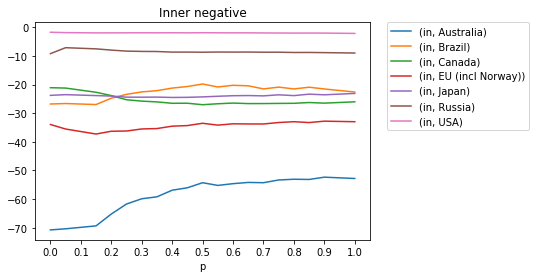

In [16]:
plt = df_inner_negative.plot()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.set_title('Inner negative')
plt.set_xticks([x*0.10 for x in range(11)])
plt

In [17]:
df_op = pd.pivot_table(df, index=['p'], columns=['actor'], values=['op'])
df_op

op                                                               \
actor Australia     Brazil     Canada EU (incl Norway)      Japan     Russia   
p                                                                              
0.00   2.223189  25.545052  21.783112         2.714986   2.879714  96.217750   
0.05   1.885726  26.098713  21.770310         2.445819   2.849082  96.818122   
0.15   1.761704  25.526838  22.018688         2.505063   3.605039  96.875822   
0.20   2.065314  25.243921  22.160807         2.603575   5.099073  97.436420   
0.25   2.311076  24.900545  22.418569         2.711249   6.494171  97.806624   
0.30   2.477990  24.842484  22.651637         2.764398   7.186537  98.023379   
0.35   2.525418  24.806381  22.848347         2.792950   7.562140  98.172213   
0.40   2.746819  24.741403  23.147738         2.854228   8.475440  98.408440   
0.45   2.868579  24.685783  23.298649         2.879409   8.843101  98.520553   
0.50   3.071519  24.751489  23.633648         2.925153   9.573580  98.787643   
0.55   2.917686  24.644724  23.575861         2.884709   9.219963  98.623147   
0.60   3.010841  24.610032  24.030228         2.889351   9.497378  98.750347   
0.65   3.019493  24.572945  24.190993         2.909703   9.702026  98.947711   
0.70   2.876228  24.653540  24.136634         2.854800   9.715221  98.936877   
0.75   3.042508  24.512782  24.524691         2.935596  10.180530  99.280786   
0.80   3.032761  24.514566  24.719000         2.920171  10.271362  99.360316   
0.85   3.050400  24.456582  24.791583         2.921023  10.388536  99.369858   
0.90   3.099949  24.570643  24.893998         2.967442  10.600815  99.232656   
1.00   2.958296  24.522432  25.251790         2.951130  10.545671  99.601474   

                  
actor        USA  
p                 
0.00   12.559506  
0.05   12.575903  
0.15   12.767039  
0.20   12.845866  
0.25   12.974965  
0.30   12.982290  
0.35   12.999142  
0.40   12.996094  
0.45   13.002696  
0.50   12.973421  
0.55   12.972006  
0.60   12.926995  
0.65   12.945396  
0.70   12.960954  
0.75   12.879510  
0.80   12.930485  
0.85   12.898633  
0.90   12.846401  
1.00   12.854715

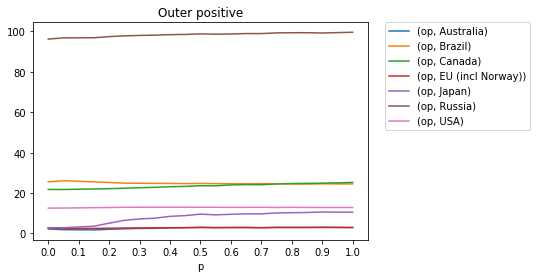

In [18]:
plt = df_op.plot()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.set_title('Outer positive')
plt.set_xticks([x*0.10 for x in range(11)])
plt

In [19]:
df_on = pd.pivot_table(df, index=['p'], columns=['actor'], values=['on'])
df_on

on                                                      \
actor  Australia     Brazil      Canada EU (incl Norway)       Japan   
p                                                                      
0.00  -83.265937 -69.604654 -135.037581       -18.488603 -123.987538   
0.05  -88.607801 -64.378583 -135.013951       -16.603268 -124.027876   
0.15  -89.546643 -63.714119 -133.720038       -17.584008 -124.067124   
0.20  -91.857204 -65.117453 -134.194836       -17.775755 -124.197179   
0.25  -94.000302 -66.012287 -133.893068       -18.173696 -124.156289   
0.30  -95.039304 -66.725734 -134.297155       -18.179230 -124.225569   
0.35  -95.356769 -67.136588 -134.215220       -18.414888 -124.206616   
0.40  -96.787519 -67.759438 -134.849638       -18.305719 -124.266494   
0.45  -97.168958 -68.162605 -135.219826       -18.295363 -124.420419   
0.50  -98.184249 -68.854217 -135.807426       -18.159179 -124.570032   
0.55  -97.828878 -67.772496 -135.734383       -18.270161 -124.697258   
0.60  -98.225024 -68.479134 -136.261830       -18.216083 -124.950576   
0.65  -98.345888 -68.190973 -136.394181       -18.159569 -124.942247   
0.70  -98.480547 -67.329423 -136.471834       -18.282611 -125.113554   
0.75  -98.951108 -67.821300 -137.342855       -18.117087 -125.529893   
0.80  -99.393222 -67.521267 -137.588421       -18.105187 -125.452053   
0.85  -99.363378 -67.993630 -138.112581       -18.031525 -125.876315   
0.90  -99.893394 -67.598542 -138.424305       -17.928141 -125.617396   
1.00  -99.784517 -66.627833 -138.991398       -17.964584 -126.460007   

                             
actor     Russia        USA  
p                            
0.00  -20.518962 -10.664835  
0.05  -20.594820 -10.504478  
0.15  -20.580754 -10.477969  
0.20  -20.143209 -10.266327  
0.25  -19.877532 -10.189084  
0.30  -19.651440 -10.153070  
0.35  -19.636465 -10.069682  
0.40  -19.309815 -10.051081  
0.45  -19.164791  -9.973218  
0.50  -18.933545  -9.995126  
0.55  -18.979469 -10.095605  
0.60  -18.794358 -10.055621  
0.65  -18.778935 -10.110061  
0.70  -18.642216 -10.022696  
0.75  -18.422822 -10.041390  
0.80  -18.310773 -10.048220  
0.85  -18.185062 -10.073926  
0.90  -18.068983 -10.041601  
1.00  -17.815054 -10.049270

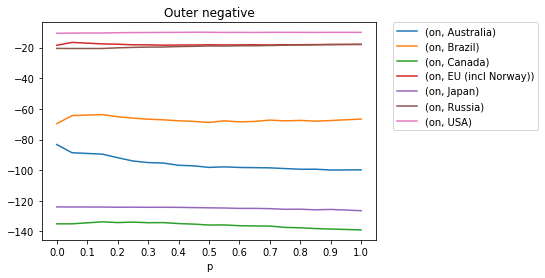

In [20]:
plt = df_on.plot()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.set_title('Outer negative')
plt.set_xticks([x*0.10 for x in range(11)])
plt

In [21]:
df_own = pd.pivot_table(df, index=['p'], columns=['actor'], values=['own'])
df_own

own                                                           \
actor Australia    Brazil    Canada EU (incl Norway)     Japan    Russia   
p                                                                          
0.00   0.569838  1.354359  2.001915        10.388760  1.208533  0.303050   
0.05   0.571363  1.389741  2.200931        10.454752  1.188747  0.308628   
0.15   0.573189  1.464224  2.271043        10.808333  1.197543  0.312411   
0.20   0.565927  1.502833  2.319174        10.908469  1.216171  0.327179   
0.25   0.566040  1.542710  2.375222        11.002174  1.247833  0.342457   
0.30   0.572428  1.573771  2.413676        11.203574  1.273101  0.351054   
0.35   0.579615  1.612365  2.483981        11.383221  1.297353  0.357085   
0.40   0.590669  1.666153  2.554162        11.532623  1.336692  0.365795   
0.45   0.602657  1.686271  2.615928        11.823502  1.366054  0.374733   
0.50   0.612065  1.737520  2.683918        12.122630  1.399239  0.381789   
0.55   0.633587  1.754112  2.753959        12.288538  1.449747  0.381626   
0.60   0.647006  1.796352  2.804496        12.606611  1.489259  0.389388   
0.65   0.660795  1.834663  2.887737        12.781477  1.540464  0.393964   
0.70   0.666096  1.877625  2.969692        12.941028  1.568175  0.395861   
0.75   0.678414  1.909927  3.065277        13.324071  1.596064  0.403453   
0.80   0.695125  1.928447  3.121277        13.531275  1.638794  0.405424   
0.85   0.709652  1.980352  3.175834        13.876934  1.689848  0.407668   
0.90   0.730713  2.018798  3.259382        14.184057  1.723223  0.412743   
1.00   0.759036  2.072105  3.414149        14.576306  1.829492  0.419577   

                 
actor       USA  
p                
0.00   5.957285  
0.05   5.939004  
0.15   6.028779  
0.20   6.072731  
0.25   6.149691  
0.30   6.212960  
0.35   6.259759  
0.40   6.289255  
0.45   6.359210  
0.50   6.362076  
0.55   6.380177  
0.60   6.380101  
0.65   6.456293  
0.70   6.507639  
0.75   6.468269  
0.80   6.550042  
0.85   6.555868  
0.90   6.594540  
1.00   6.605235

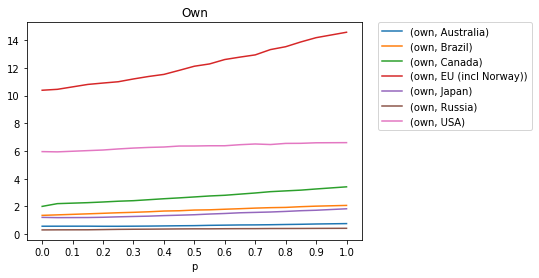

In [22]:
plt = df_own.plot()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.set_title('Own')
plt.set_xticks([x*0.10 for x in range(11)])
plt